In [30]:
import pandas as pd
import numpy as np
data = pd.read_csv("regdata.csv")

In [31]:
data = data.filter(['date2','hour','vader_sent_hourly mean','Close','price dir','movement'])
data

,date2,hour,vader_sent_hourly mean,Close,price dir,movement
0,2019-01-01,0,0.147142,3700.31,0.000,0
1,2019-01-01,1,0.158979,3689.69,3.538,1
2,2019-01-01,2,0.151551,3690.00,3.656,1
3,2019-01-01,3,0.183226,3693.13,1.340,1
4,2019-01-01,4,0.202897,3692.71,-2.038,0
...,...,...,...,...,...,...
7146,2019-10-31,19,0.209381,9211.04,-5.522,0
7147,2019-10-31,20,0.177808,9185.98,-5.600,0
7148,2019-10-31,21,0.153912,9126.20,-22.674,0
7149,2019-10-31,22,0.138465,9122.69,-24.144,0


In [32]:
time_len = data.shape[0]
print(time_len)
x = data.filter(['vader_sent_hourly mean','Close',"movement"])
x["movement at t"] = x["movement"]
print(x)
#Normalize the data for training
#normalized_x =  x/np.linalg.norm(x, ord=np.inf, axis=1, keepdims=True)
#print(normalized_x)

from sklearn import preprocessing

xx = x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(xx)
#df = pd.DataFrame(x_scaled)
print(x_scaled)

7151
      vader_sent_hourly mean    Close  movement  movement at t
0                   0.147142  3700.31         0              0
1                   0.158979  3689.69         1              1
2                   0.151551  3690.00         1              1
3                   0.183226  3693.13         1              1
4                   0.202897  3692.71         0              0
...                      ...      ...       ...            ...
7146                0.209381  9211.04         0              0
7147                0.177808  9185.98         0              0
7148                0.153912  9126.20         0              0
7149                0.138465  9122.69         0              0
7150                0.192858  9140.85         0              0

[7151 rows x 4 columns]
[[0.30218862 0.0315168  0.         0.        ]
 [0.32328959 0.03051438 1.         1.        ]
 [0.31004717 0.03054364 1.         1.        ]
 ...
 [0.31425676 0.5436662  0.         0.        ]
 [0.28671938 0.543334

In [33]:
#make time series table
import copy
# x_scaled is normalised data
#0 is prev sentiment 1 is prev close 2 is prev movement 3 is current movement
for i in range(1,len(x_scaled)):
    print(x_scaled[i,:3])
    x_scaled[-i,:3] = (x_scaled[-i-1,:3])


[0.32328959 0.03051438 1.        ]
[0.31004717 0.03054364 1.        ]
[0.36651359 0.03083908 1.        ]
[0.4015798  0.03079944 0.        ]
[0.27733098 0.03148187 0.        ]
[0.24293607 0.03182357 1.        ]
[0.25765034 0.03279295 1.        ]
[0.24266085 0.03306385 1.        ]
[0.34122027 0.03148282 1.        ]
[0.39575469 0.03272121 1.        ]
[0.25016143 0.03219924 1.        ]
[0.27695741 0.03309217 1.        ]
[0.26155892 0.03299117 0.        ]
[0.22957197 0.03134878 0.        ]
[0.26403674 0.0298461  0.        ]
[0.42524171 0.03087778 0.        ]
[0.31276706 0.03019628 0.        ]
[0.28823319 0.02765625 0.        ]
[0.17885296 0.03117888 0.        ]
[0.42721842 0.03328095 1.        ]
[0.36212394 0.03226248 1.        ]
[0.24077071 0.03254471 1.        ]
[0.13393838 0.04065658 1.        ]
[0.30886041 0.03819677 0.        ]
[0.23193385 0.03916616 1.        ]
[0.13867444 0.03856678 0.        ]
[0.22397114 0.03979385 1.        ]
[0.09718258 0.03979102 1.        ]
[0.24821046 0.040219

In [24]:
x_scaled[0:30]
new_x = x_scaled[1:,:]
new_x[0:30]


array([[0.30218862, 0.0315168 , 0.        , 1.        ],
       [0.32328959, 0.03051438, 1.        , 1.        ],
       [0.31004717, 0.03054364, 1.        , 1.        ],
       [0.36651359, 0.03083908, 1.        , 0.        ],
       [0.4015798 , 0.03079944, 0.        , 0.        ],
       [0.27733098, 0.03148187, 0.        , 1.        ],
       [0.24293607, 0.03182357, 1.        , 1.        ],
       [0.25765034, 0.03279295, 1.        , 1.        ],
       [0.24266085, 0.03306385, 1.        , 1.        ],
       [0.34122027, 0.03148282, 1.        , 1.        ],
       [0.39575469, 0.03272121, 1.        , 1.        ],
       [0.25016143, 0.03219924, 1.        , 1.        ],
       [0.27695741, 0.03309217, 1.        , 0.        ],
       [0.26155892, 0.03299117, 0.        , 0.        ],
       [0.22957197, 0.03134878, 0.        , 0.        ],
       [0.26403674, 0.0298461 , 0.        , 0.        ],
       [0.42524171, 0.03087778, 0.        , 0.        ],
       [0.31276706, 0.03019628,

In [34]:
import keras
from keras.datasets import reuters, imdb
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN, GRU, Dense, Dropout, Activation, Embedding
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split

In [35]:
labels = new_x[:,3]

#labels = labels.astype('int')
print(labels)
features = new_x[:,:3]
features[:,2] = features[:,2].astype('int')
print(features.shape,labels.shape)
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

print(y_test,y_test.shape)

[1. 1. 1. ... 0. 0. 0.]
(7150, 3) (7150,)
[0. 1. 0. ... 0. 0. 1.] (1430,)


In [36]:

x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_train.shape)

(5720, 1, 3)


In [49]:

# design network
model = Sequential()
model.add(LSTM(4, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(x_train, y_train, epochs=50, batch_size=72, validation_data=(x_test, y_test), verbose=2, shuffle=False)
# plot history


Train on 5720 samples, validate on 1430 samples
Epoch 1/50
 - 0s - loss: 0.5001 - val_loss: 0.4977
Epoch 2/50
 - 0s - loss: 0.4961 - val_loss: 0.4913
Epoch 3/50
 - 0s - loss: 0.4873 - val_loss: 0.4784
Epoch 4/50
 - 0s - loss: 0.4721 - val_loss: 0.4586
Epoch 5/50
 - 0s - loss: 0.4514 - val_loss: 0.4348
Epoch 6/50
 - 0s - loss: 0.4268 - val_loss: 0.4086
Epoch 7/50
 - 0s - loss: 0.3999 - val_loss: 0.3803
Epoch 8/50
 - 0s - loss: 0.3715 - val_loss: 0.3524
Epoch 9/50
 - 0s - loss: 0.3445 - val_loss: 0.3275
Epoch 10/50
 - 0s - loss: 0.3219 - val_loss: 0.3073
Epoch 11/50
 - 0s - loss: 0.3048 - val_loss: 0.2917
Epoch 12/50
 - 0s - loss: 0.2912 - val_loss: 0.2799
Epoch 13/50
 - 0s - loss: 0.2817 - val_loss: 0.2710
Epoch 14/50
 - 0s - loss: 0.2737 - val_loss: 0.2643
Epoch 15/50
 - 0s - loss: 0.2677 - val_loss: 0.2591
Epoch 16/50
 - 0s - loss: 0.2628 - val_loss: 0.2551
Epoch 17/50
 - 0s - loss: 0.2595 - val_loss: 0.2520
Epoch 18/50
 - 0s - loss: 0.2562 - val_loss: 0.2495
Epoch 19/50
 - 0s - loss:

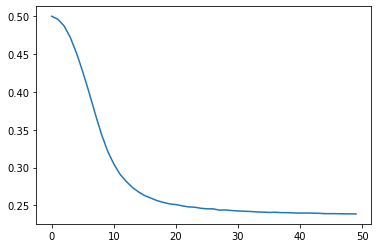

In [50]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.show()

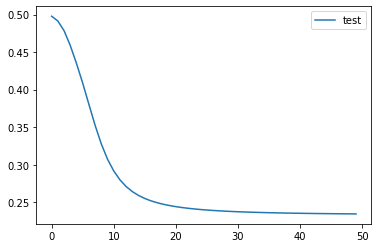

In [51]:

pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [52]:
# make a prediction
from sklearn.metrics import mean_squared_error

import math
from numpy import concatenate
#x_test = test_X.reshape((x_test.shape[0], x_test.shape[2]))
yhat = model.predict(x_test)
#print(yhat.score)
rmse = math.sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.482


In [48]:
from sklearn import metrics
#print(yhat[0:90])
for i in range(yhat.shape[0]):
    if yhat[i] >0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
matrix = metrics.confusion_matrix(y_test,yhat)
print(matrix)
score = model.evaluate(x_test, y_test, batch_size=72, verbose=1)
print('Test score:', score)
print('Test accuracy:', score)

[[516 146]
 [188 580]]
1430/1430 [==============================] - 0s 8us/step
Test score: 0.2348102711714231
Test accuracy: 0.2348102711714231


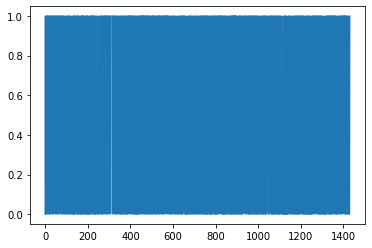

In [54]:
pyplot.plot(yhat)
